# Final Group Project

In [ ]:
#Mount with Google Drive
from google.colab import drive
drive.mount('/content/drive')
import os 
os.chdir('/content/drive/MyDrive/DAT 562 Project') 

Mounted at /content/drive


## Prepare For Datasets: Review, Business, and Merged Datasets

In [ ]:
# Read Files
import json
#OPENING YELP Business DATASETS
with open("yelp_academic_dataset_business.json",encoding="utf-8") as f:
    business = f.read().strip().split("\n")
business=[json.loads(i) for i in business]
print(business[0])
print(len(business))
#OPENING YELP Business DATASETS
reviews=[]
with open("yelp_academic_dataset_review.json",encoding="utf-8") as f:
    for i in f:
      content=i
      reviews.append(json.loads(content))
  
print(reviews[0])
len(reviews)

{'business_id': '0DI8Dt2PJp07XkVvIElIcQ', 'name': 'Innovative Vapors', 'neighborhood': '', 'address': '227 E Baseline Rd, Ste J2', 'city': 'Tempe', 'state': 'AZ', 'postal_code': '85283', 'latitude': 33.3782141, 'longitude': -111.936102, 'stars': 4.5, 'review_count': 17, 'is_open': 0, 'attributes': ['BikeParking: True', 'BusinessAcceptsBitcoin: False', 'BusinessAcceptsCreditCards: True', "BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'DogsAllowed: False', 'RestaurantsPriceRange2: 2', 'WheelchairAccessible: True'], 'categories': ['Tobacco Shops', 'Nightlife', 'Vape Shops', 'Shopping'], 'hours': ['Monday 11:0-21:0', 'Tuesday 11:0-21:0', 'Wednesday 11:0-21:0', 'Thursday 11:0-21:0', 'Friday 11:0-22:0', 'Saturday 10:0-22:0', 'Sunday 11:0-18:0'], 'type': 'business'}
144072
{'review_id': 'NxL8SIC5yqOdnlXCg18IBg', 'user_id': 'KpkOkG6RIf4Ra25Lhhxf1A', 'business_id': '2aFiy99vNLklCx3T_tGS9A', 'stars': 5, 'date': '2011-10-10', 'text': "If yo

4153150

In [ ]:
# Construct review dataframe

# View TimeFrame
date = [review['date'] for review in reviews]
print(max(date),min(date))
# each line of the file is a separate JSON object
texts = [review['text'] for review in reviews]
stars = [review['stars'] for review in reviews]
business_id=[review['business_id'] for review in reviews]
useful=[review['useful'] for review in reviews]

import pandas as pd
df=pd.DataFrame({"bid":business_id,"stars":stars,"reviews":texts,"date":date,"useful":useful})
# Generate Year Variable
def f(x):
  return int(x[:4])
df["year"]=df.date.apply(f)

2017-01-20 2004-07-22


In [ ]:
# Construct business info dataframe
import pandas as pd
business_id_2 = [i['business_id'] for i in business]
category = [i['categories'] for i in business]
names= [i['name'] for i in business]
stars_2= [i['stars'] for i in business]
postal_code=[i['postal_code'] for i in business]
state=[i['state'] for i in business]
city=[i['city'] for i in business]
df_b=pd.DataFrame({"bid":business_id_2,"postal_code":postal_code,"state":state,"city":city,"categories":category})
df_b.head()
df_b.shape

(144072, 5)

In [ ]:
# Merge business info and reviews (dataset: df_big)
df_big=pd.merge(df,df_b,how="left",left_on="bid",right_on="bid")
print(df_big.shape)
df_big.head()

(4153150, 10)


,bid,stars,reviews,date,useful,year,postal_code,state,city,categories
0,2aFiy99vNLklCx3T_tGS9A,5,If you enjoy service by someone who is as comp...,2011-10-10,0,2011,85050,AZ,Phoenix,"[Web Design, IT Services & Computer Repair, Lo..."
1,2aFiy99vNLklCx3T_tGS9A,5,After being on the phone with Verizon Wireless...,2010-12-29,1,2010,85050,AZ,Phoenix,"[Web Design, IT Services & Computer Repair, Lo..."
2,2aFiy99vNLklCx3T_tGS9A,5,Great service! Corey is very service oriented....,2011-04-29,0,2011,85050,AZ,Phoenix,"[Web Design, IT Services & Computer Repair, Lo..."
3,2LfIuF3_sX6uwe-IR-P0jQ,5,Highly recommended. Went in yesterday looking ...,2014-07-14,0,2014,85013,AZ,Phoenix,"[Home & Garden, Antiques, Home Decor, Shopping]"
4,2LfIuF3_sX6uwe-IR-P0jQ,4,I walked in here looking for a specific piece ...,2014-01-15,0,2014,85013,AZ,Phoenix,"[Home & Garden, Antiques, Home Decor, Shopping]"


In [ ]:
del reviews
del business

## Data Description

In [ ]:
# Review Date Distribution
df["year"].value_counts(normalize=True).sort_index()

2004    0.000004
2005    0.000208
2006    0.001349
2007    0.005503
2008    0.014684
2009    0.023559
2010    0.044634
2011    0.069160
2012    0.083111
2013    0.113317
2014    0.161848
2015    0.216824
2016    0.251771
2017    0.014029
Name: year, dtype: float64

In [ ]:
# Business ID Distribution
print(df.bid.value_counts()[:10])
print(sum(df.bid.value_counts(normalize=True)[:round(df.shape[0]/100)]))


4JNXUYY8wbaaDmk3BPzlWw    6414
RESDUcs7fIiihp38-d6_6g    5715
K7lWdNUhCbcnEvI0NhGewg    5216
cYwJA2A6I12KNkm2rtXd5g    5116
DkYS3arLOhA8si5uUEmHOw    4655
hihud--QRriCYZw1zZvW4g    4120
eoHdUeQDNgQ6WYEnP2aiRw    3911
f4x1YBxkLrZg652xt2KR5g    3881
2weQS-RnoOBhb1KsHKyoSQ    3676
ujHiaprwCQ5ewziu0Vi9rw    3482
Name: bid, dtype: int64
0.8238515343774043


In [ ]:
# BID distinct
print("Business number:",len(df.bid.value_counts()))
print("Average num reviws/ business:",len(df)/len(df.bid.value_counts()))


Business number: 144072
Average num reviws/ business: 28.82690599144872


In [ ]:
# Star Distribution
df.stars.value_counts(normalize=True)


5    0.410339
4    0.248644
1    0.130113
3    0.124573
2    0.086332
Name: stars, dtype: float64

In [ ]:
df.describe()


,stars,useful,year
count,4.153150e+06,4.153150e+06,4.153150e+06
mean,3.722765e+00,1.008271e+00,2.013840e+03
std,1.405131e+00,2.585058e+00,2.144192e+00
min,1.000000e+00,0.000000e+00,2.004000e+03
25%,3.000000e+00,0.000000e+00,2.013000e+03
50%,4.000000e+00,0.000000e+00,2.014000e+03
75%,5.000000e+00,1.000000e+00,2.016000e+03
max,5.000000e+00,1.125000e+03,2.017000e+03


In [ ]:
pd.crosstab(index=df['stars'], columns=df.useful.apply(lambda x: 1 if x !=0 else 0))


useful,0,1
stars,,
1,258627,281750
2,180828,177722
3,286053,231316
4,583940,448714
5,1063442,640758


In [ ]:

# average useful times by review stars
df.groupby(df["stars"]).useful.mean()


stars
1    1.341495
2    1.168183
3    1.055421
4    1.070230
5    0.817108
Name: useful, dtype: float64

In [ ]:

#View Most Frequent Categories of Business
temp=df_b.categories
temp1=[]
for i in temp:
  if type(i)==list:
    temp1 +=i
temp1=pd.DataFrame(temp1)
print(temp1.value_counts(normalize=True)[:20])
#df_temp=pd.DataFrame(temp1.value_counts())
#df_temp.to_csv(r'category frequency for business.csv',index=True)


Restaurants                  0.091897
Shopping                     0.042581
Food                         0.040161
Beauty & Spas                0.025987
Home Services                0.021306
Nightlife                    0.019947
Health & Medical             0.019856
Bars                         0.017223
Automotive                   0.016213
Local Services               0.015415
Event Planning & Services    0.013692
Active Life                  0.012741
Fashion                      0.011039
American (Traditional)       0.010068
Fast Food                    0.009951
Pizza                        0.009911
Sandwiches                   0.009894
Coffee & Tea                 0.009664
Hair Salons                  0.009208
Hotels & Travel              0.009206
dtype: float64


In [ ]:

#View Most Frequent Categories of Reviews
temp=df_big.categories

temp1=[]
for i in temp:
  if type(i)==list:
    temp1 +=i
temp1=pd.DataFrame(temp1)
print(temp1.value_counts(normalize=True)[:20])
df_temp=pd.DataFrame(temp1.value_counts())
df_temp.to_csv(r'category frequency for review.csv',index=True)


Restaurants                  0.149859
Food                         0.043408
Nightlife                    0.038712
Bars                         0.035124
American (New)               0.023968
American (Traditional)       0.022674
Breakfast & Brunch           0.019187
Event Planning & Services    0.017356
Shopping                     0.016914
Arts & Entertainment         0.015508
Beauty & Spas                0.013852
Sandwiches                   0.013833
Mexican                      0.013674
Italian                      0.013420
Pizza                        0.013086
Hotels & Travel              0.012724
Burgers                      0.012194
Coffee & Tea                 0.010432
Japanese                     0.010083
Seafood                      0.009493
dtype: float64


In [ ]:
df_big.value_counts("city")

city
Las Vegas                  1295505
Phoenix                     456673
Toronto                     349696
Scottsdale                  245105
Charlotte                   183619
                            ...   
CHARLOTTE                        3
Mooers                           3
Saint-Roch-De-L'achigan          3
Morriston                        3
East Credit                      3
Length: 878, dtype: int64

## Hoping to focus on restaurants and generate dataset

In [ ]:
#Generate restaurant-related binary variable
df_big["restaurant"]=df_big.categories.apply(lambda x: 1 if x is not None and "Restaurants" in x else 0)

In [ ]:
#Check whether there are enough Data for All restaurant in Year 2017
df_big.loc[(df_big.restaurant==1) & (df_big.year>=2017),].stars.value_counts()


5    15688
4     8144
1     4321
3     4194
2     2927
Name: stars, dtype: int64

In [ ]:
#Generate restaurant dataset
df_restaurant=df_big.loc[(df_big.restaurant==1)]
df_restaurant.head()

,bid,stars,reviews,date,useful,year,postal_code,state,city,categories,restaurant
31,4P-vTvE6cncJyUyLh73pxw,4,This place is a area staple! Been around for y...,2014-03-29,0,2014,44141,OH,Brecksville,"[Nightlife, American (Traditional), Pubs, Rest...",1
32,4P-vTvE6cncJyUyLh73pxw,4,Got my mojo back after having a few of their a...,2014-08-14,0,2014,44141,OH,Brecksville,"[Nightlife, American (Traditional), Pubs, Rest...",1
33,4P-vTvE6cncJyUyLh73pxw,4,"Don't go here for the decor, but the staff is ...",2012-10-20,1,2012,44141,OH,Brecksville,"[Nightlife, American (Traditional), Pubs, Rest...",1
34,4P-vTvE6cncJyUyLh73pxw,5,I believe in awarding stars bearing in mind th...,2012-08-25,2,2012,44141,OH,Brecksville,"[Nightlife, American (Traditional), Pubs, Rest...",1
35,4P-vTvE6cncJyUyLh73pxw,4,"If you like fried food and laid back, then thi...",2015-07-27,0,2015,44141,OH,Brecksville,"[Nightlife, American (Traditional), Pubs, Rest...",1


### Prepare for Data Modeling

In [ ]:
#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

     |████████████████████████████████| 1.7 MB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 40.6 MB/s 
     |████████████████████████████████| 15.7 MB 47.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=89690878b57acdd97525e13dfadb7af8e24448f236d17c4869b4230002828c6a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import MutableMapping, Sequence  # noqa
/usr/local/lib/python3.7/dist-packages/jsonschema/compat.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python

     |████████████████████████████████| 49 kB 3.5 MB/s 
  Created wheel for html.parser: filename=html_parser-0.2-py3-none-any.whl size=1328 sha256=302afd1525d98823d12ad2b29470f996388f00c473b96fb189566236794a5996
  Stored in directory: /root/.cache/pip/wheels/11/86/38/0554afea46105c70bae8d223c427bba371aa0c83ce88d57b27
Successfully built html.parser
     |████████████████████████████████| 23.7 MB 1.2 MB/s 
     |████████████████████████████████| 419 kB 29.1 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 81 kB 8.6 MB/s 
     |████████████████████████████████| 100 kB 7.3 MB/s 
     |████████████████████████████████| 130 kB 34.7 MB/s 
     |████████████████████████████████| 5.6 MB 15.8 MB/s 
     |████████████████████████████████| 97 kB 6.2 MB/s 
     |████████████████████████████████| 3.6 MB 36.4 MB/s 
  Created wheel for pattern3: filename=pattern3-3.0.0-py2.py3-none-any.whl size=18554351 sha256=044c7bb0b0524f6025bbf49e3992c5335e077a

In [ ]:
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [ ]:
# Define Bag-of-Words vecgtorizer, vectorize data, and word-weights dataframe
def get_word_weights(normalized_reviews,numTopic,numTopWords,doc_topic_prior=0.25,topic_word_prior=0.25):
  bow_vectorizer = CountVectorizer(max_features=1000)
  bow = bow_vectorizer.fit_transform(normalized_reviews)
  lda=LatentDirichletAllocation(n_components=numTopic, max_iter=100,doc_topic_prior = doc_topic_prior,topic_word_prior = topic_word_prior).fit(bow)
  print("Log-Likelihood (higher values are better): ", lda.score(bow))
  print("Perplexity (lower values are better): ", lda.perplexity(bow))
  no_top_words = numTopWords
  #display_topics(lda, bow_vectorizer.get_feature_names(), no_top_words)
  word_weights = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
  return(pd.DataFrame(word_weights.T,index = bow_vectorizer.get_feature_names(),columns = ["Topic_" + str(i) for i in range(numTopic)]))


# Topic Modeling

## Consider data in the most recent year--2017

In [ ]:
# Generate Normalized Dataset
r_reviews=df_restaurant["reviews"].loc[df_restaurant.year>=2017]
normalized_reviews=normalize_corpus(r_reviews)

### Transform reviews into 3 topics and look for what consumers care about

In [ ]:
# Look for 3 topics and corresponding 10 most frequent words

word_weights_df=get_word_weights(normalized_reviews,3,10,0.5,0.5)
for i in range(3):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")


Log-Likelihood (higher values are better):  -7996002.451706701
Perplexity (lower values are better):  522.3011982880071
Topic: 0
good       0.022201
chicken    0.018175
order      0.017107
like       0.015454
sauce      0.012143
dish       0.011514
taste      0.011373
fry        0.010811
salad      0.009972
cheese     0.009382
Name: Topic_0, dtype: float64
 
Topic: 1
order      0.022889
food       0.022401
time       0.019699
us         0.016539
wait       0.014577
take       0.014412
table      0.012323
service    0.011657
place      0.010312
like       0.009927
Name: Topic_1, dtype: float64
 
Topic: 2
great        0.043667
food         0.040965
place        0.036428
good         0.027239
service      0.024376
love         0.017454
best         0.014948
friendly     0.014227
always       0.013389
delicious    0.011894
Name: Topic_2, dtype: float64
 


In [ ]:
# Look for 4 topics and corresponding 10 most frequent words

word_weights_df=get_word_weights(normalized_reviews,4,10,0.5,0.5)
for i in range(4):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -7996382.044080114
Perplexity (lower values are better):  522.4563950366223
Topic: 0
order      0.028216
food       0.024436
time       0.022238
us         0.019896
take       0.017728
wait       0.016466
service    0.012818
table      0.012458
give       0.011629
even       0.010583
Name: Topic_0, dtype: float64
 
Topic: 1
good      0.031193
place     0.024803
like      0.015852
menu      0.013406
really    0.012121
bar       0.011791
food      0.011590
drink     0.011260
nice      0.010686
pretty    0.010277
Name: Topic_1, dtype: float64
 
Topic: 2
great        0.058047
food         0.054009
place        0.038154
service      0.033453
love         0.026123
best         0.022509
good         0.021056
always       0.020057
friendly     0.018452
delicious    0.018414
Name: Topic_2, dtype: float64
 
Topic: 3
chicken    0.022823
order      0.020684
good       0.020637
sauce      0.015249
like       0.014304
fry        0.013576
dish       0.01249

In [ ]:
'''
!pip install --upgrade pandas==1.2
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.sklearn.prepare(lda, bow, bow_vectorizer, mds='tsne')
'''

'\n!pip install --upgrade pandas==1.2\n#prepare to display result in the Jupyter notebook\npyLDAvis.enable_notebook()\n\n#run the visualization [mds is a function to use for visualizing the "distance" between topics]\npyLDAvis.sklearn.prepare(lda, bow, bow_vectorizer, mds=\'tsne\')\n'

## Hoping to focus on most popular city--Las Vegas in 2017

In [ ]:
df_restaurant_lv=df_restaurant[(df_restaurant.city=="Las Vegas")&(df_restaurant.year==2017)]
df_restaurant_lv

,bid,stars,reviews,date,useful,year,postal_code,state,city,categories,restaurant
127057,A0X1baHPgw9IiBRivu0G9g,5,I've been coming here for about 5 years now an...,2017-01-06,0,2017,89117,NV,Las Vegas,"[French, Food, Bakeries, Restaurants]",1
127098,A0X1baHPgw9IiBRivu0G9g,5,This is the best kept secret in Las Vegas. Ev ...,2017-01-04,1,2017,89117,NV,Las Vegas,"[French, Food, Bakeries, Restaurants]",1
127183,A0X1baHPgw9IiBRivu0G9g,4,We continued our tour of Las Vegas Macarons at...,2017-01-10,0,2017,89117,NV,Las Vegas,"[French, Food, Bakeries, Restaurants]",1
130126,e0JOkQYz_cnz91k6X55PLw,5,Very good Italian food and ever better service...,2017-01-13,1,2017,89109,NV,Las Vegas,"[Italian, Restaurants]",1
130349,e0JOkQYz_cnz91k6X55PLw,5,We came to Sinatra to celebrate our 40th weddi...,2017-01-15,1,2017,89109,NV,Las Vegas,"[Italian, Restaurants]",1
...,...,...,...,...,...,...,...,...,...,...,...
4150386,QJR4qBUHegWEozSQrGmBPw,5,Olives is always a mainstay when I go to Vegas...,2017-01-14,2,2017,89109,NV,Las Vegas,"[Bars, American (New), Restaurants, Nightlife,...",1
4150429,QJR4qBUHegWEozSQrGmBPw,5,"I had very high expectations for this place, a...",2017-01-16,0,2017,89109,NV,Las Vegas,"[Bars, American (New), Restaurants, Nightlife,...",1
4152180,7qFtiPg0gdbk911_mj6LoA,5,Excellent food and service. Same ownership as...,2017-01-16,0,2017,89121,NV,Las Vegas,"[Steakhouses, Restaurants, Seafood, Buffets]",1
4152416,fXSOxjL7FP_sVew1gXnOIw,3,"Not the best pizza I've ever had, but it'll do...",2017-01-04,26,2017,89109,NV,Las Vegas,"[Restaurants, Pizza]",1


In [ ]:
normalized_reviews_lv=normalize_corpus(df_restaurant_lv.reviews)

In [ ]:
word_weights_df=get_word_weights(normalized_reviews_lv,3,10,0.5,0.5)
for i in range(3):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -2495043.509542076
Perplexity (lower values are better):  526.8367989754469
Topic: 0
food        0.042719
great       0.042303
place       0.037267
service     0.027785
good        0.025824
vega        0.019953
best        0.017399
love        0.016169
friendly    0.013431
always      0.012207
Name: Topic_0, dtype: float64
 
Topic: 1
order      0.020573
food       0.020190
us         0.018181
time       0.017410
take       0.014720
wait       0.014326
table      0.011878
like       0.010751
service    0.010416
place      0.010361
Name: Topic_1, dtype: float64
 
Topic: 2
good       0.023019
order      0.018362
chicken    0.017086
like       0.014419
sauce      0.011533
taste      0.010792
fry        0.010718
dish       0.010648
really     0.009256
flavor     0.008954
Name: Topic_2, dtype: float64
 


In [ ]:
word_weights_df=get_word_weights(normalized_reviews_lv,4,10,0.75,0.5)
for i in range(4):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -2493585.662377975
Perplexity (lower values are better):  524.9111939414254
Topic: 0
good       0.028939
like       0.021044
order      0.018679
chicken    0.017578
fry        0.015647
cheese     0.012912
really     0.012428
taste      0.012187
burger     0.012187
steak      0.009873
Name: Topic_0, dtype: float64
 
Topic: 1
good          0.018421
dish          0.017396
sushi         0.013015
order         0.012894
rice          0.012552
restaurant    0.011597
roll          0.011480
soup          0.011052
dessert       0.010301
sauce         0.010115
Name: Topic_1, dtype: float64
 
Topic: 2
order      0.020945
us         0.020776
time       0.020005
food       0.019864
wait       0.017374
take       0.016819
table      0.013504
even       0.010818
service    0.010810
give       0.010758
Name: Topic_2, dtype: float64
 
Topic: 3
food        0.054912
great       0.052523
place       0.046290
service     0.035338
good        0.025784
vega        0

## Hoping to focus on most popular restaurant

In [ ]:
print(df_restaurant.iloc[:,0:2].groupby(by="bid").count().sort_values(by="stars",ascending=False))
bid_pop=df_restaurant.iloc[:,0:2].groupby(by="bid").count().sort_values(by="stars",ascending=False).index[0]


                        stars
bid                          
4JNXUYY8wbaaDmk3BPzlWw   6414
RESDUcs7fIiihp38-d6_6g   5715
K7lWdNUhCbcnEvI0NhGewg   5216
cYwJA2A6I12KNkm2rtXd5g   5116
DkYS3arLOhA8si5uUEmHOw   4655
...                       ...
D5U--oPlJ0VJqBw-SEg38Q      3
lbWXP4CTUFwyEXLGEDJ8yA      3
lbUKEN7XVdD_FEF61TlQeA      3
0jeEhjIO6AFAzsOi2A1rUw      3
wB8SWcTrYWSSZQkRgJ-C-w      3

[48485 rows x 1 columns]


In [ ]:
df_restaurant_pop=df_restaurant[df_restaurant.bid==bid_pop]

In [ ]:
normalized_reviews_pop=normalize_corpus(df_restaurant_pop.reviews)

In [ ]:
word_weights_df=get_word_weights(normalized_reviews_pop,3,10,0.35,0.35)
for i in range(3):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -1927310.497354848
Perplexity (lower values are better):  494.42877478932024
Topic: 0
breakfast    0.031168
egg          0.021619
brunch       0.018686
crepe        0.018028
good         0.016946
order        0.013471
benedict     0.011630
french       0.011204
toast        0.010951
great        0.010535
Name: Topic_0, dtype: float64
 
Topic: 1
food          0.025920
great         0.023222
service       0.016602
vega          0.016120
place         0.015451
good          0.014735
bellagio      0.014689
view          0.014652
restaurant    0.014419
patio         0.014230
Name: Topic_1, dtype: float64
 
Topic: 2
steak     0.027873
order     0.019942
good      0.017817
french    0.012071
like      0.011685
bread     0.010759
frites    0.010608
soup      0.010340
onion     0.009622
fry       0.009133
Name: Topic_2, dtype: float64
 


In [ ]:
word_weights_df=get_word_weights(normalized_reviews_pop,4,10,0.75,0.75)
for i in range(4):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -1924178.0609471633
Perplexity (lower values are better):  489.4688303884623
Topic: 0
us             0.019655
table          0.019646
food           0.017193
wait           0.015972
reservation    0.014626
time           0.013660
order          0.013143
restaurant     0.011695
seat           0.011552
take           0.011286
Name: Topic_0, dtype: float64
 
Topic: 1
breakfast    0.032294
egg          0.022407
brunch       0.019343
good         0.019082
crepe        0.018665
french       0.013311
sandwich     0.012432
benedict     0.012056
delicious    0.011478
toast        0.011343
Name: Topic_1, dtype: float64
 
Topic: 2
great       0.043077
food        0.032545
vega        0.028755
view        0.024756
bellagio    0.024322
service     0.021581
place       0.020951
patio       0.020504
fountain    0.019724
strip       0.019012
Name: Topic_2, dtype: float64
 
Topic: 3
steak     0.040979
good      0.020647
order     0.017946
french    0.016252
f

## Best/Worst Restaurants with more than 2K reviews

In [ ]:
review_count=df_restaurant.iloc[:,0:2].groupby(by="bid").count()>=2000
review1000=review_count[review_count.stars==True].index
rank_star=df_restaurant[["bid","stars"]].loc[df_restaurant.bid.isin(review1000)].groupby("bid").mean().sort_values(by='stars')
best_id=rank_star.index[-1]
df_best=df_restaurant[df_restaurant.bid==best_id]
worst_id=rank_star.index[0]
df_worst=df_restaurant[df_restaurant.bid==worst_id]

## Best Restaurant's Topic

In [ ]:
df_b.loc[df_b.bid==best_id]

,bid,postal_code,state,city,categories
34945,hihud--QRriCYZw1zZvW4g,89169,NV,Las Vegas,"[Korean, Japanese, Restaurants, Tapas/Small Pl..."


In [ ]:
normalized_reviews_best=normalize_corpus(df_best.reviews)

In [ ]:
word_weights_df=get_word_weights(normalized_reviews_best,3,10,0.5,0.5)
for i in range(3):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -541570.6731553278
Perplexity (lower values are better):  362.1815577884689
Topic: 0
food          0.064057
great         0.062562
service       0.043213
place         0.039263
good          0.033949
korean        0.032828
bbq           0.030232
vega          0.024683
definitely    0.022480
recommend     0.019104
Name: Topic_0, dtype: float64
 
Topic: 1
meat       0.022301
order      0.018917
food       0.018765
good       0.018500
us         0.014633
place      0.013372
wait       0.012633
people     0.012020
review     0.011611
service    0.009898
Name: Topic_1, dtype: float64
 
Topic: 2
good       0.028963
beef       0.028068
meat       0.021478
spicy      0.020169
order      0.018971
pork       0.018223
side       0.017729
bulgogi    0.017171
dish       0.015708
kalbi      0.014952
Name: Topic_2, dtype: float64
 


In [ ]:
word_weights_df=get_word_weights(normalized_reviews_best,4,10,0.5,0.5)
for i in range(4):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -542593.4431317066
Perplexity (lower values are better):  366.23422717543787
Topic: 0
beef       0.036212
spicy      0.026022
good       0.025922
pork       0.023509
bulgogi    0.022146
order      0.019953
kalbi      0.019289
korean     0.018450
belly      0.014055
soup       0.013716
Name: Topic_0, dtype: float64
 
Topic: 1
food          0.068310
great         0.063917
service       0.046301
place         0.044610
korean        0.041239
bbq           0.036548
vega          0.031587
good          0.029511
definitely    0.022029
recommend     0.021791
Name: Topic_1, dtype: float64
 
Topic: 2
happy     0.025041
hour      0.024409
wait      0.017435
review    0.016407
food      0.016043
place     0.014932
us        0.014000
time      0.012762
free      0.012249
good      0.011171
Name: Topic_2, dtype: float64
 
Topic: 3
meat       0.087993
good       0.042651
order      0.026389
side       0.025623
dish       0.023848
food       0.022129
quality

## Worst Restaurant's Topic

In [ ]:
df_b.loc[df_b.bid==worst_id]

,bid,postal_code,state,city,categories
90359,eoHdUeQDNgQ6WYEnP2aiRw,89109,NV,Las Vegas,"[American (New), American (Traditional), Socia..."


In [ ]:
normalized_reviews_worst=normalize_corpus(df_worst.reviews)

In [ ]:
word_weights_df=get_word_weights(normalized_reviews_worst,3,10,0.5,0.5)
for i in range(3):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -1149478.469825308
Perplexity (lower values are better):  448.08917835130137
Topic: 0
good         0.023769
food         0.022265
place        0.015312
order        0.013397
hot          0.013214
great        0.012734
fry          0.011587
burger       0.011219
chocolate    0.010240
dessert      0.009964
Name: Topic_0, dtype: float64
 
Topic: 1
chocolate      0.059692
hot            0.052762
frozen         0.040660
cream          0.017866
good           0.014820
like           0.014522
ice            0.012936
serendipity    0.012076
sundae         0.011928
place          0.011524
Name: Topic_1, dtype: float64
 
Topic: 2
wait       0.032943
us         0.022905
food       0.021436
order      0.019632
table      0.018524
take       0.018139
minute     0.017989
service    0.017646
time       0.015861
place      0.013017
Name: Topic_2, dtype: float64
 


In [ ]:
word_weights_df=get_word_weights(normalized_reviews_worst,4,10,0.5,0.5)
for i in range(4):
  print("Topic:",i)
  print(word_weights_df.iloc[:,i].sort_values(ascending=False).head(10))
  print(" ")

Log-Likelihood (higher values are better):  -1149010.311043634
Perplexity (lower values are better):  446.97641683902424
Topic: 0
good        0.028716
food        0.020851
fry         0.020218
order       0.019413
burger      0.017268
cheese      0.014728
sandwich    0.013893
chicken     0.013820
salad       0.011717
really      0.010843
Name: Topic_0, dtype: float64
 
Topic: 1
vega           0.033596
place          0.027968
food           0.023228
serendipity    0.023179
dessert        0.019279
great          0.017892
time           0.016257
strip          0.014883
good           0.013827
restaurant     0.010341
Name: Topic_1, dtype: float64
 
Topic: 2
wait       0.038946
us         0.027747
order      0.023005
take       0.022250
table      0.022013
food       0.020894
minute     0.019613
service    0.017691
time       0.015111
seat       0.013212
Name: Topic_2, dtype: float64
 
Topic: 3
chocolate    0.090160
hot          0.081562
frozen       0.063041
cream        0.023404
like     

# Lexicon-Based Sentiment Amalysis


## Set year to be 2017

In [ ]:
## Prepare polarity label
# We make score 4,5 to  positive (1) and score 1,2 to  negtive(0)
def sentiment_assign(x):
  if x ==3:
    return None
  return "positive" if x > 2 else "negative"
df_restaurant['sentiment'] = df_restaurant["stars"].apply( sentiment_assign )

sa_df=df_restaurant.loc[(df_restaurant.year>=2017),["reviews","sentiment"]].dropna()
sa_df.sentiment.value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


positive    23832
negative     7248
Name: sentiment, dtype: int64

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Set initial to be 0.3

In [ ]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.4, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']

# Call
VADER_polarity_test = [analyze_sentiment_vader_lexicon(i, threshold=0.3) for i in sa_df.reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.9262
1,negative,0.0392
2,positive,0.9144
3,positive,0.7959
4,negative,-0.7089


In [ ]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(sa_df.sentiment, 
                                 VADER_polarity_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.878 



In [ ]:
pd.crosstab(pd.Series(sa_df['sentiment'].reset_index(drop=True)),pd.Series(VADER_polarity_test_df['VADER Polarity']),
            rownames = ['True:'], 
            colnames = ['Predicted:'])

Predicted:,negative,positive
True:,,
negative,4173,3075
positive,704,23128


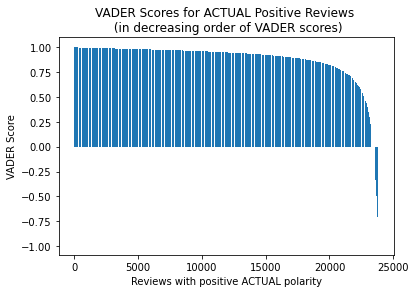

In [ ]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df.loc[sa_df.sentiment.reset_index(drop=True)=="positive"]['VADER Score']
plt.bar(range(0,sa_df.sentiment.value_counts()[0]),pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

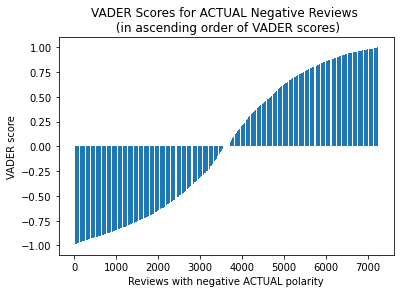

In [ ]:

pos_reviews_scored = VADER_polarity_test_df.loc[sa_df.sentiment.reset_index(drop=True)=="negative"]['VADER Score']
plt.bar(range(0,sa_df.sentiment.value_counts()[1]),pos_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (in ascending order of VADER scores)")
plt.show()

## Different Threshold

In [ ]:
def VADER_accurancy(reviews,sentiment,threshold):
  VADER_polarity_test = [analyze_sentiment_vader_lexicon(i, threshold=threshold) for i in reviews]
  VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
  return (np.round(metrics.accuracy_score(sentiment,VADER_polarity_test_df['VADER Polarity']), 3))


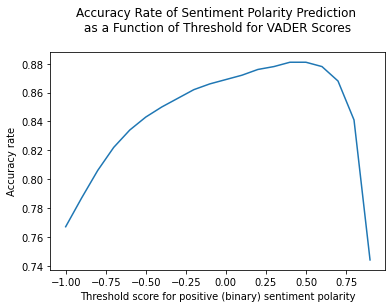

In [ ]:
# Plot accuracy for thresholds between -1 and 1 with step 0.1
Thresholds=[]
for i in range(-10,10,1):
  Thresholds.append(VADER_accurancy(sa_df["reviews"],sa_df["sentiment"],i/10))
plt.plot([i/10 for i in range(-10,10,1)],Thresholds,)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

## Train with equal-proportion sample and compare with random sample of same size


### Equal-proportion sample

In [ ]:
temp1=sa_df.loc[sa_df.sentiment=="positive"].sample(5000)
temp2=sa_df.loc[sa_df.sentiment=="negative"].sample(5000)
sa_df_equal=temp1.append(temp2)

In [ ]:
for i in range(10):
  print(VADER_accurancy(sa_df_equal["reviews"],sa_df_equal["sentiment"],i/10))

0.741
0.753
0.764
0.776
0.789
0.804
0.812
0.819
0.82
0.782


In [ ]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(i, threshold=0.8) for i in sa_df_equal.reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])

In [ ]:
pd.crosstab(pd.Series(sa_df_equal['sentiment'].reset_index(drop=True)),pd.Series(VADER_polarity_test_df['VADER Polarity']),
            rownames = ['True:'], 
            colnames = ['Predicted:'])

Predicted:,negative,positive
True:,,
negative,3935,1065
positive,736,4264


### Random Sample

In [ ]:
sa_df_random=sa_df.sample(10000)

In [ ]:
for i in range(10):
  print(VADER_accurancy(sa_df_random["reviews"],sa_df_random["sentiment"],i/10))

0.869
0.872
0.877
0.88
0.882
0.883
0.88
0.868
0.841
0.748


In [ ]:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(i, threshold=0.4) for i in sa_df_random.reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])

In [ ]:
pd.crosstab(pd.Series(sa_df_random['sentiment'].reset_index(drop=True)),pd.Series(VADER_polarity_test_df['VADER Polarity']),
            rownames = ['True:'], 
            colnames = ['Predicted:'])

Predicted:,negative,positive
True:,,
negative,1386,938
positive,239,7437


# Sentiment Analysis - Logistic Regression

In [ ]:
!pip install scikit-learn==0.24.1
#preparation
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsq
import statsmodels
import sklearn 
import nltk
import json
import numpy as np

     |████████████████████████████████| 22.3 MB 1.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
Mounted at /content/drive


In [ ]:
#data loading
def load_data(filepath):
    data = []
    # Open file and read in line by line
    with open(filepath, encoding="utf-8") as file:
        for line in file:
            # Strip out trailing whitespace at the end of the line
            data.append(json.loads(line.rstrip()))
    return data


review_data = load_data('/content/drive/MyDrive/DAT 562 Project/yelp_academic_dataset_review.json')
business_data = load_data('/content/drive/MyDrive/DAT 562 Project/yelp_academic_dataset_business.json')
review_data = pd.DataFrame.from_dict(review_data)
business_data = pd.DataFrame.from_dict(business_data)
business_data = business_data.drop(columns=["stars","type"])
df_big=pd.merge(review_data,business_data,how="left",left_on="business_id",right_on="business_id")
df_big["restaurant"]=df_big.categories.apply(lambda x: 1 if x is not None and "Restaurants" in x else 0)
df_review = df_big[df_big['restaurant'] == 1]


In [ ]:
# Polarity: We make score 4,5 to  positive (1) and score 1,2 to  negtive(0)
def sentiment_assign(x):
  if x ==3:
    return None
  return 1 if x > 2 else 0
df_review['sentiment'] = df_review["stars"].apply( sentiment_assign )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# fill in NA
empty_text = (df_review['text'].isnull() \
            | df_review['sentiment'].isnull())
df_review = df_review[~empty_text]
print(df_review['sentiment'].value_counts())

#Umbalence data preprocess - unsample data with 10,000 data for each sentiment level 
def sample_data(n):
    return pd.concat([df_review[df_review['sentiment'] == i].head(n) for i in range(0,2)])
df_resample = sample_data(10000)

df_resample['sentiment'].value_counts()

1.0    1672766
0.0     528134
Name: sentiment, dtype: int64


1.0    10000
0.0    10000
Name: sentiment, dtype: int64

In [ ]:
from gensim.utils import simple_preprocess 
df_resample['prep'] = df_resample['text'].apply(simple_preprocess)


#Stemming words and case lower
from gensim.parsing.porter import PorterStemmer
def stem(ws):
  return [PorterStemmer().stem(w) for w in ws]
df_resample['prep'] = df_resample['prep'].apply(stem)

#join word list to sentence
def toSentence(x):
  return " ".join(x)

df_resample['clean'] = df_resample['prep'].apply(toSentence)

df_resample['clean'].head()
df_review.iloc[0]


review_id                                  6-hKBi-6RC3g7Mft0c-6qw
user_id                                    PmgqNO0-5Y3e3UoR61TD7w
business_id                                4P-vTvE6cncJyUyLh73pxw
stars                                                           4
date                                                   2014-03-29
text            This place is a area staple! Been around for y...
useful                                                          0
funny                                                           0
cool                                                            0
type                                                       review
name                                          London Pickle Works
neighborhood                                                     
address                                         7265 Fitzwater Rd
city                                                  Brecksville
state                                                          OH
postal_cod

In [ ]:
#split data into train and test sets
from sklearn.model_selection import train_test_split
def split_train_test(data, test_size=0.2, shuffle_state = True):
    FEATURES = ['clean',"stars","useful","cool"]
    X_train, X_test, Y_train, Y_test = train_test_split(
                                                        data[FEATURES],
                                                        data['sentiment'], 
                                                        shuffle = shuffle_state,
                                                        test_size = test_size, 
                                                        random_state = 24)

    print("Term frequency (training)")
    print(Y_train.value_counts())
    print("Term frequency (testing)")
    print(Y_test.value_counts())
    
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()    
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
  
    
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df_resample)

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import words
params = {
          "ngram_range" : (1,3),
          "max_features" : 10000,
          "stop_words" :"english"
}
tfidf = TfidfVectorizer(**params)

# print(X_train['stem_tokens'])
train_tv = tfidf.fit_transform(X_train['clean'])
test_tv = tfidf.transform(X_test['clean'])
vocab = tfidf.get_feature_names()


dist = np.sum(train_tv, axis=0)
checking = pd.DataFrame(dist, columns = vocab)
checking

df_resample.iloc[0]
print(df_resample['text'].iloc[1])




Term frequency (training)
0.0    8033
1.0    7967
Name: sentiment, dtype: int64
Term frequency (testing)
1.0    2033
0.0    1967
Name: sentiment, dtype: int64
Unmmmm, no. It's a bar with tables in the next room. It's feels grungy. Service was good, food, not so much. Praying I don't get sick!
Everything tasted like it came from a can! Nothing fresh or tasty about it. 
Guess who won't be back?


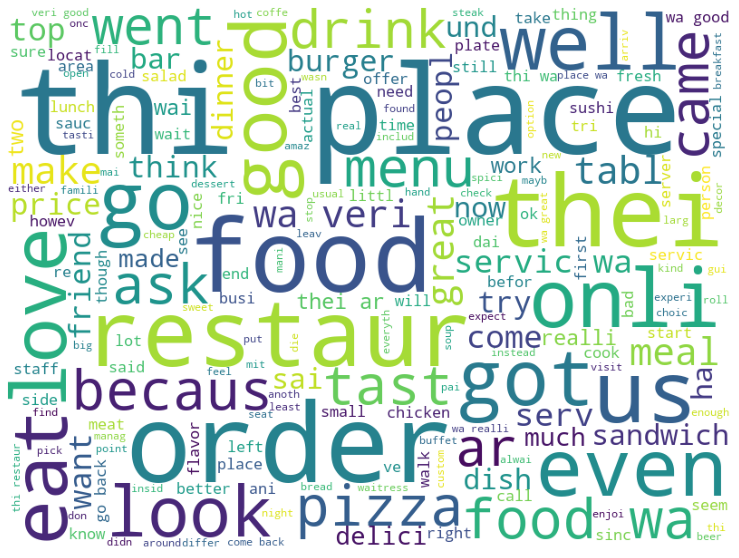

In [ ]:
#generate word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# %matplotlib inline
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

cloud(' '.join(X_train['clean']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


median of word frequency:  86.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


median of uniuqe word frequency:  64.0


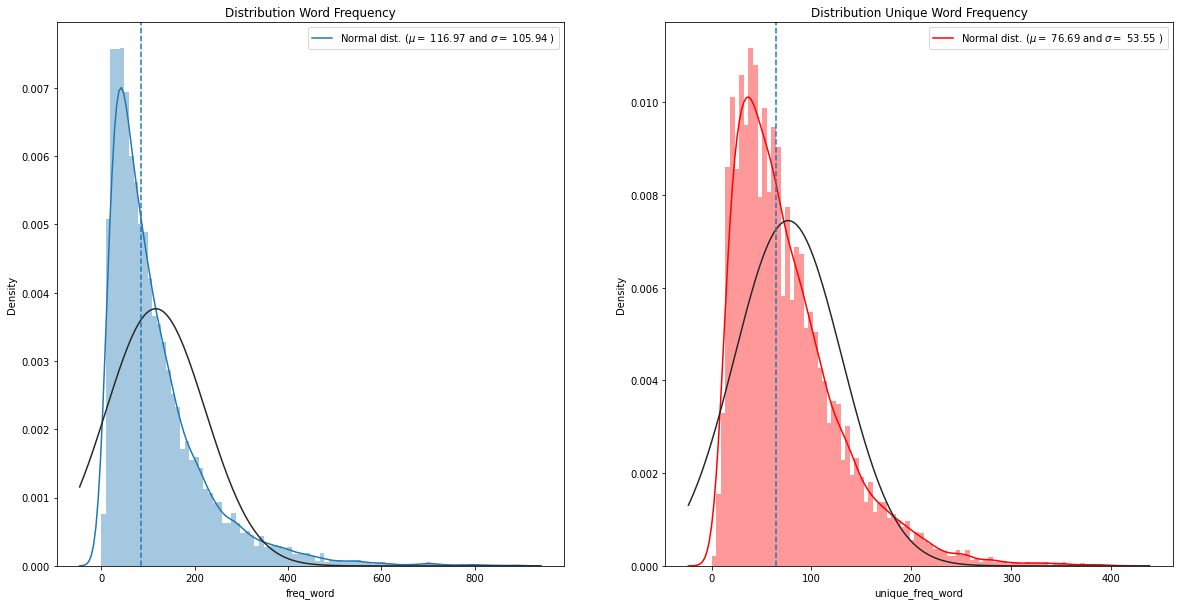

In [ ]:
#word disdribution
#Observe distribution

X_train['freq_word'] = X_train['clean'].apply(lambda x: len(str(x).split()))
X_train['unique_freq_word'] = X_train['clean'].apply(lambda x: len(set(str(x).split())))
                                                 
X_test['freq_word'] = X_test['clean'].apply(lambda x: len(str(x).split()))
X_test['unique_freq_word'] = X_test['clean'].apply(lambda x: len(set(str(x).split())))                  

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(20,10)

sns.distplot(X_train['freq_word'], bins = 90, ax=axes[0], fit = stats.norm)
(mu0, sigma0) = stats.norm.fit(X_train['freq_word'])
axes[0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu0, sigma0)],loc='best')
axes[0].set_title("Distribution Word Frequency")
axes[0].axvline(X_train['freq_word'].median(), linestyle='dashed')
print("median of word frequency: ", X_train['freq_word'].median())


sns.distplot(X_train['unique_freq_word'], bins = 90, ax=axes[1], color = 'r', fit = stats.norm)
(mu1, sigma1) = stats.norm.fit(X_train['unique_freq_word'])
axes[1].set_title("Distribution Unique Word Frequency")
axes[1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu1, sigma1)],loc='best')
axes[1].axvline(X_train['unique_freq_word'].median(), linestyle='dashed')
print("median of uniuqe word frequency: ", X_train['unique_freq_word'].median())

#Modeling - TF-iDF data is high dim and spare data. linear model like  SVM would be the better chioces rather than tree method


In [ ]:
#preparation for model fitting
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve

from sklearn.linear_model import LogisticRegression

kfold = StratifiedKFold( n_splits = 10 , random_state = 24,shuffle=True )

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 5, 'class_weight': {1: 1}, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9707313686272283


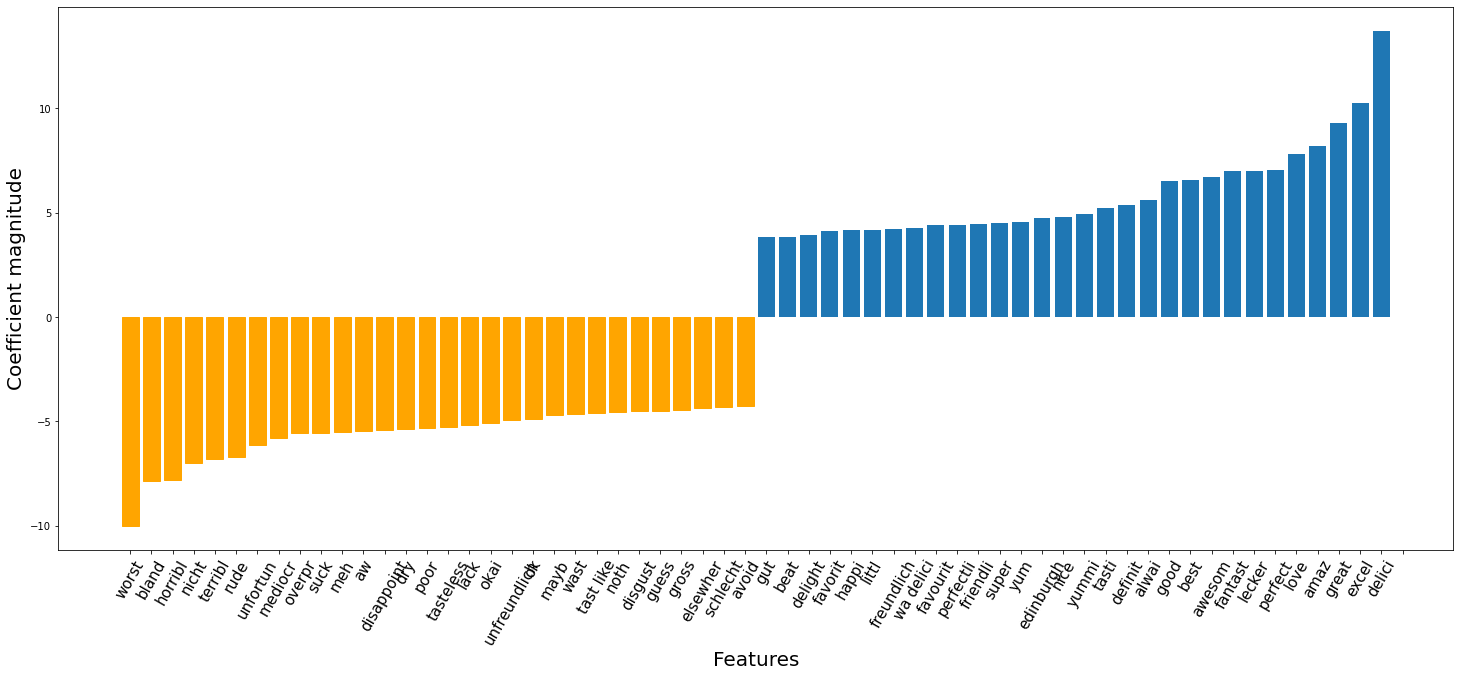

In [ ]:
# Logistic Regression model
lr = LogisticRegression(random_state = 24)

lr2_param = {
    'penalty':['l2'],
    'C':[5],
    'class_weight':[{1:1}],
    'solver':['lbfgs'],
    }

lr_CV = GridSearchCV(lr, param_grid = [lr2_param], cv = kfold, scoring = 'roc_auc', n_jobs = 1, verbose = 1)
lr_CV.fit(train_tv, Y_train['sentiment'])
print(lr_CV.best_params_)
logi_best = lr_CV.best_estimator_


print(lr_CV.best_score_)

# Extract the coefficients from the best model Logistic Regression and sort them by index.
coefficients = logi_best.coef_
index = coefficients.argsort()

# Extract the feature names.
feature_names = np.array(tfidf.get_feature_names())

feature_names[index][0][:30]

feature_names[index][0][-30::]

index_comb = list(coefficients[0][index[0][:30]]) + list(coefficients[0][index[0][-30::]])
feature_names = list(feature_names[index][0][:30]) + list(feature_names[index][0][-30::])
plt.figure(figsize=(25,10))
barlist = plt.bar(list(i for i in range(60)), index_comb)
plt.xticks(list(i for i in range(61)) , feature_names, rotation=60 , size=15)
plt.ylabel('Coefficient magnitude',size=20)
plt.xlabel('Features',size=20)

# color the first smallest 30 bars red
for i in range(30):
    barlist[i].set_color('orange')

plt.show()


In [ ]:
# LR evaluation
train_predict = logi_best.predict(train_tv)
test_predict = logi_best.predict(test_tv)
acc_train= sum(train_predict==Y_train['sentiment'])/len(train_predict)
acc_test= sum(test_predict==Y_test['sentiment'])/len(test_predict)
print("Train accuracy:",acc_train)
print("Test accuracy:",acc_test)

Train accuracy: 0.9736875
Test accuracy: 0.9165


# Bigram Network

In [ ]:
#preparation
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsq
import statsmodels
import sklearn 
import nltk
import json
import numpy as np

#data loading
def load_data(filepath):
    data = []
    # Open file and read in line by line
    with open(filepath, encoding="utf-8") as file:
        for line in file:
            # Strip out trailing whitespace at the end of the line
            data.append(json.loads(line.rstrip()))
    return data


review_data = load_data('/content/drive/MyDrive/DAT 562 Project/yelp_academic_dataset_review.json')
business_data = load_data('/content/drive/MyDrive/DAT 562 Project/yelp_academic_dataset_business.json')
review_data = pd.DataFrame.from_dict(review_data)
business_data = pd.DataFrame.from_dict(business_data)
business_data = business_data.drop(columns=["stars","type"])
df_big=pd.merge(review_data,business_data,how="left",left_on="business_id",right_on="business_id")
df_big["restaurant"]=df_big.categories.apply(lambda x: 1 if x is not None and "Restaurants" in x else 0)
df_review = df_big[df_big['restaurant'] == 1]


In [ ]:
#filter out the most popular restaurant
Popular = df_review[df_review['business_id']==bid_pop] 

In [ ]:
# use bigram to analyze co-occurence words
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from collections import Counter
import re
import networkx as nx
import warnings
warnings.filterwarnings("ignore")



In [ ]:
review_text = Popular["text"].tolist()
review_text[2]

'Great ambiance, great service , great food. Love, love this place. I also appreciate that they have a gluten free menu and gave gluten free bread with the best olives I have had.\nI ordered the strak classique with cooked spinachand it was really tender and absolutely delicious. I will come back and try their other dishes.'

In [ ]:
#tokenize review
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def clean_text(text):
    """
    This function takes as input a text on which several 
    NLTK algorithms will be applied in order to preprocess it
    """
    tokens = word_tokenize(text)
    # Remove the punctuations
    tokens = [word for word in tokens if word.isalpha()]
    # Lower the tokens
    tokens = [word.lower() for word in tokens]
    # Remove stopword
    tokens = [word for word in tokens if not word in stopwords.words("english")]
    # Lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word, pos = "v") for word in tokens]
    tokens = [lemma.lemmatize(word, pos = "n") for word in tokens]
    return tokens
# clean_review = clean_text(review_text[2])
# clean_review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['great',
 'ambiance',
 'great',
 'service',
 'great',
 'food',
 'love',
 'love',
 'place',
 'also',
 'appreciate',
 'gluten',
 'free',
 'menu',
 'give',
 'gluten',
 'free',
 'bread',
 'best',
 'olive',
 'order',
 'strak',
 'classique',
 'cook',
 'spinachand',
 'really',
 'tender',
 'absolutely',
 'delicious',
 'come',
 'back',
 'try',
 'dish']

In [ ]:
# all_text = []
# for i in range (len(review_text)):
#   clean_review = clean_text(review_text[i])
#   all_text.append(clean_review)
# all_text  

In [ ]:
text2 = []
for i in range(len(review_text)):
  unit_text2 = [word for word in review_text[i].split() if (word.isalpha() & (word not in stopwords.words("english")))]
  text2 += unit_text2

In [ ]:
# term_all = []
# for i in range(len(review_text)):
#     bbb = list(nltk.bigrams(text2[i]))
#     term_all += bbb

In [ ]:
bigram_all = list(nltk.bigrams(text2))
bigram_counts = collections.Counter(bigram_all)
bigram_counts.most_common(20)=
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(Mon, Ami)",1522
1,"(Ami, Gabi)",942
2,"(I, would)",825
3,"(I, ordered)",778
4,"(The, food)",696
5,"(view, Bellagio)",580
6,"(The, service)",494
7,"(I, think)",436
8,"(onion, soup)",389
9,"(I, love)",387


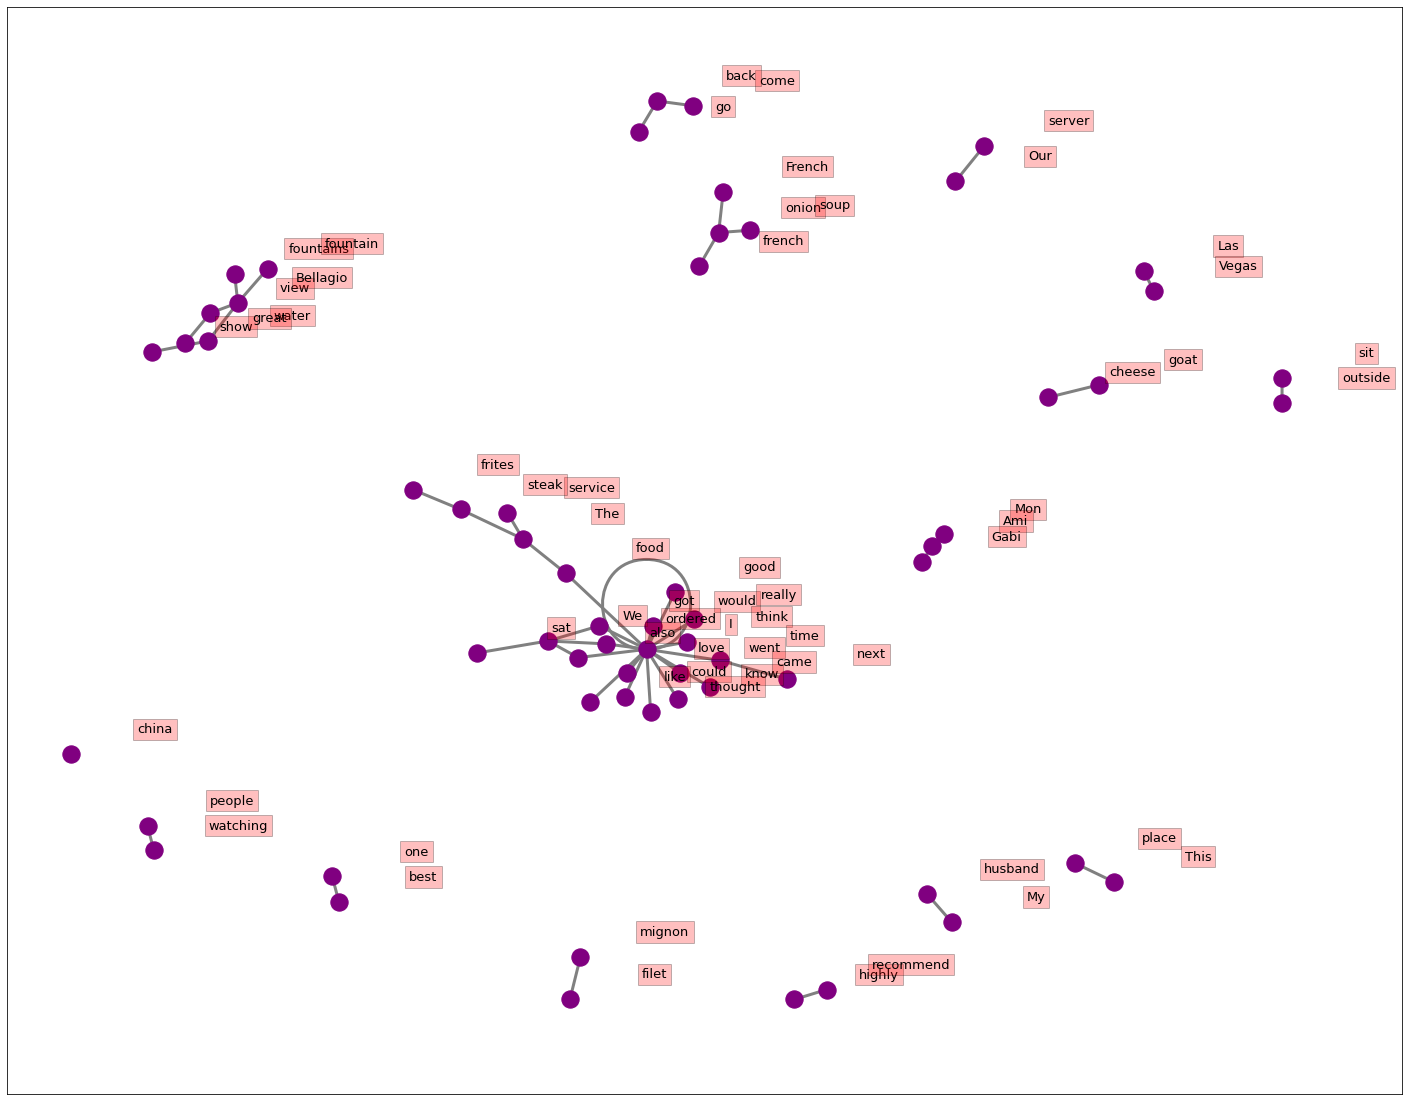

In [ ]:
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)

fig, ax = plt.subplots(figsize=(25, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()
